# Demonstrating Proper H2 Dissociation using GVB

One of the big flaws of Hartree Fock theory is its inability to describe low-overlap/dissociated chemical bonds. Use the GVB capability in PyQuante to illustrate this as simply as possible.

In [2]:
%matplotlib inline
from pyquante2.scf.mcscf import gvb
from pyquante2.geo.samples import h
from pyquante2.geo.molecule import molecule
import matplotlib.pyplot as plt

First, get the HF energy for H atom:

In [ ]:
Eh = gvb(h)
print(Eh)

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(...)? (1893121032.py, line 2)

Now do the HF dissociation for H2 under HF:

In [3]:
Rs = [0.3,0.5,0.6,0.7,0.8,0.9,1.1,1.3,1.5,1.7,1.9,2.5]

Ehf = []
for R in Rs:
    h2 = molecule([(1,0,0,-R/2.),(1,0,0,R/2)],units='Angstrom')
    Ehf.append(gvb(h2))
    
Egvb = []
for R in Rs:
    h2 = molecule([(1,0,0,-R/2.),(1,0,0,R/2)],units='Angstrom')
    Egvb.append(gvb(h2,npair=1))



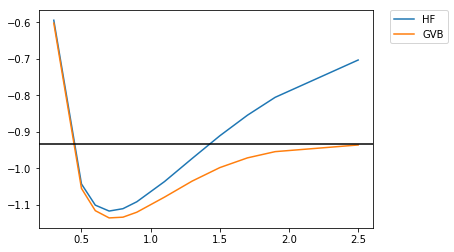

In [4]:
plt.plot(Rs,Ehf,label='HF')
plt.plot(Rs,Egvb,label='GVB')
plt.axhline(y=2*Eh,color='k')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) 

Pick a geometry close to dissociation and plot orbitals:

In [5]:
R = 1.5
h2 = molecule([(1,0,0,-R/2.),(1,0,0,R/2)],units='Angstrom')
E,orbs = gvb(h2,npair=1,return_orbs=True)

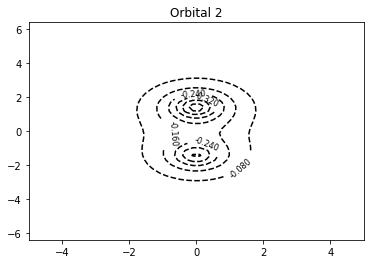

In [9]:
from pyquante2.graphics.contourplot import contourplot
from pyquante2.basis.basisset import basisset
bfs = basisset(h2,'sto3g')
contourplot('xz',h2,orbs[1],bfs,title="Orbital 2")

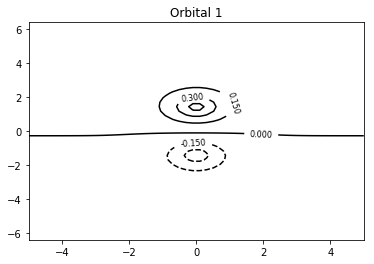

In [11]:
contourplot('xz',h2,orbs[0],bfs,title="Orbital 1")

In this case the orbitals were swapped: the *g* orbital is the second orbital, and the *u* orbital is the first orbital. This can happen when the bonds are close to dissociation, and both orbitals are equally occupied.